# Importing libraries

Importing this due to depreciating things in numpy

In [ ]:
import numpy as np
np.object = np.object_
np.bool = np.bool_
np.int = np.int_
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
    else:
        print("Failed to detect a GPU.")

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import os
import shutil

# Preparing training dataset

In [ ]:
original_dataset_dir = "D:\\Upm Degree\\FYP\\DCNN dataset\\archive\\spec_dataset"
classes = ["specs_128", "specs_320"]  # Folder names corresponding to the two classes
base_split_dir = "D:\\air_selangor_fft_monitoring_system\\fyp_dcnn\\archive"

train_split = 0.7  # 70% training
val_split = 0.15  # 15% validation
test_split = 0.15  # 15% testing

train_dir = os.path.join(base_split_dir, "train")
val_dir = os.path.join(base_split_dir, "validation")
test_dir = os.path.join(base_split_dir, "test")

# Copying data from original folder to training/testing dataset

### Zip folder of data first for data preparation
during trial and error, there are instances where more than 2 folders were being used

In [ ]:
import zipfile

# bees_zip_path = '/content/bees_spectrograms.zip'
# stingless_zip_path = '/content/stingless_bees_spectrograms.zip'
# bees_2_zip_path = '/content/bees_spectrograms_2.zip'
# stingless_2_zip_path = '/content/stingless_bees_spectrograms_2.zip'

#bees_zip_path = '/content/bees.zip'
human_zip_path = '/content/human.zip'
#bees_zip_path = '/content/bees.zip'
calf_zip_path = '/content/calf.zip'

# # Unzip the contents
# with zipfile.ZipFile(bees_zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content')

# with zipfile.ZipFile(stingless_zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content')


# # Unzip the contents for the 2nd folders
# with zipfile.ZipFile(bees_2_zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content')

# with zipfile.ZipFile(stingless_2_zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content')

# Unzip the contents for the 2nd folders
with zipfile.ZipFile(human_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

with zipfile.ZipFile(calf_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# with zipfile.ZipFile(bees_zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content')


In [ ]:
# folders_to_check = [
#     '/content/bees_spectrograms',
#     '/content/stingless_bees_spectrograms',
#     '/content/bees_spectrograms_2',
#     '/content/stingless_bees_spectrograms_2'
# ]

folders_to_check = [
    '/content/human',
    '/content/calf',
]

# File extensions to look for
valid_extensions = ('.jpg', '.jpeg', '.png')

# Count and print results
for folder in folders_to_check:
    if os.path.exists(folder):
        file_count = sum(
            1 for file in os.listdir(folder)
            if file.lower().endswith(valid_extensions)
        )
        print(f"{os.path.basename(folder)}: {file_count} image files")
    else:
        print(f"{folder} not found.")


human: 192 image files
calf: 192 image files


#### This part if have addition of folders (Eg. have 2 folders that have additions with _2. If have 4 folders

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from uuid import uuid4  # To generate unique filenames

original_dataset_dir = '/content'  

class_folders = {
    'bees_spectrograms': ['bees_spectrograms_2'],
    'stingless_bees_spectrograms': ['stingless_bees_spectrograms_2']
}


train_split = 0.7
val_split = 0.15
test_split = 0.15

base_split_dir = '/content/split_dataset_more_data_4'
train_dir = os.path.join(base_split_dir, 'train')
val_dir = os.path.join(base_split_dir, 'val')
test_dir = os.path.join(base_split_dir, 'test')

def split_dataset_combined_folders():
    if os.path.exists(base_split_dir):
        shutil.rmtree(base_split_dir)  # Clean up if directories exist

    # Create directories for train, validation, and test
    for split_dir in [train_dir, val_dir, test_dir]:
        for class_name in class_folders:
            os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

    for class_name, additional_folders in class_folders.items():
        all_images = []

        # Get images from the main class folder
        main_class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(main_class_path):
            for img in os.listdir(main_class_path):
                if img.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(main_class_path, img)
                    unique_name = f"{uuid4().hex}_{img}"
                    all_images.append((image_path, unique_name))

        # Get images from the additional folders
        for folder in additional_folders:
            additional_path = os.path.join(original_dataset_dir, folder)
            if os.path.isdir(additional_path):
                for img in os.listdir(additional_path):
                    if img.lower().endswith(('.png', '.jpg', '.jpeg')):
                        image_path = os.path.join(additional_path, img)
                        unique_name = f"{uuid4().hex}_{img}"
                        all_images.append((image_path, unique_name))

        if not all_images:
            print(f"No images found for class: {class_name}")
            continue

        # Split into train, validation, and test sets
        train_paths, temp_paths = train_test_split(all_images, test_size=(1 - train_split), random_state=42)
        val_paths, test_paths = train_test_split(temp_paths, test_size=(test_split / (val_split + test_split)), random_state=42)

        # Copy files to each split folder
        for source_path, unique_name in train_paths:
            shutil.copy(source_path, os.path.join(train_dir, class_name, unique_name))
        for source_path, unique_name in val_paths:
            shutil.copy(source_path, os.path.join(val_dir, class_name, unique_name))
        for source_path, unique_name in test_paths:
            shutil.copy(source_path, os.path.join(test_dir, class_name, unique_name))

# Run the split function
split_dataset_combined_folders()
# Check number of files in each class folder for train, val, test
print("\nDataset Summary:")
for split_name, split_path in zip(['Train', 'Validation', 'Test'], [train_dir, val_dir, test_dir]):
    print(f"\n{split_name} Set:")
    for class_name in class_folders:
        class_folder = os.path.join(split_path, class_name)
        num_files = len([
            f for f in os.listdir(class_folder)
            if os.path.isfile(os.path.join(class_folder, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        print(f"  {class_name}: {num_files} files")




Dataset Summary:

Train Set:
  bees_spectrograms: 925 files
  stingless_bees_spectrograms: 949 files

Validation Set:
  bees_spectrograms: 198 files
  stingless_bees_spectrograms: 203 files

Test Set:
  bees_spectrograms: 199 files
  stingless_bees_spectrograms: 204 files


This is if only have 2 folders

In [ ]:

original_dataset_dir = '/content'  # Google Colab working directory

# classes = ['bees_spectrograms', 'stingless_bees_spectrograms']
classes = ['calf','human']

train_split = 0.7
val_split = 0.15
test_split = 0.15

base_split_dir = '/content/split_dataset_more_data2'
train_dir = os.path.join(base_split_dir, 'train')
val_dir = os.path.join(base_split_dir, 'val')
test_dir = os.path.join(base_split_dir, 'test')

# Function to split the dataset
def split_dataset():
    if os.path.exists(base_split_dir):
        shutil.rmtree(base_split_dir)  # Clean up if directories exist

    # Create directories for train, validation, and test
    for split_dir in [train_dir, val_dir, test_dir]:
        for class_name in classes:
            os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

    for class_name in classes:
        class_path = os.path.join(original_dataset_dir, class_name)
        images = os.listdir(class_path)

        images = [img for img in images if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Split into train, validation, and test sets
        train_images, temp_images = train_test_split(images, test_size=(1 - train_split), random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=(test_split / (val_split + test_split)), random_state=42)

        # Move images to corresponding 
        for image in train_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(train_dir, class_name, image))
        for image in val_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(val_dir, class_name, image))
        for image in test_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(test_dir, class_name, image))

# Call the function
split_dataset()

# Creating image generator

In [ ]:
base_split_dir = '/content/split_dataset_more_data2'
train_dir = os.path.join(base_split_dir, 'train')
val_dir = os.path.join(base_split_dir, 'val')
test_dir = os.path.join(base_split_dir, 'test')

def count_files_in_directory(directory):
    """Counts the number of files in a given directory."""
    count = 0
    if os.path.exists(directory) and os.path.isdir(directory):
        for item in os.listdir(directory):
            item_path = os.path.join(directory, item)
            if os.path.isfile(item_path):
                count += 1
    return count

print("Number of files in training data:")
if os.path.exists(train_dir) and os.path.isdir(train_dir):
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):
            file_count = count_files_in_directory(class_path)
            print(f"  {class_name}: {file_count} files")
else:
    print(f"  Directory not found: {train_dir}")

print("\nNumber of files in validation data:")
if os.path.exists(val_dir) and os.path.isdir(val_dir):
    for class_name in os.listdir(val_dir):
        class_path = os.path.join(val_dir, class_name)
        if os.path.isdir(class_path):
            file_count = count_files_in_directory(class_path)
            print(f"  {class_name}: {file_count} files")
else:
    print(f"  Directory not found: {val_dir}")

# Check the number of files in the test directory for each class
print("\nNumber of files in test data:")
if os.path.exists(test_dir) and os.path.isdir(test_dir):
    for class_name in os.listdir(test_dir):
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            file_count = count_files_in_directory(class_path)
            print(f"  {class_name}: {file_count} files")
else:
    print(f"  Directory not found: {test_dir}")

Number of files in training data:
  calf: 134 files
  human: 134 files

Number of files in validation data:
  calf: 29 files
  human: 29 files

Number of files in test data:
  calf: 29 files
  human: 29 files


In [ ]:
img_size = (224, 224)  # VGG16 input size
batch_size = 32

# Data Augmentation and Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # rescale for validation and testing
print("Training dataset directory:",train_dir)

# creating data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False # Use 'categorical' for multi-class
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=1,  # One image at a time for testing
    class_mode="binary",
    shuffle=False
)

Training dataset directory: /content/split_dataset_more_data2/train
Found 268 images belonging to 2 classes.
Found 58 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


# Building VG16 model

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Build the full model
model2 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification
])

# Compile the model
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",  # Binary classification
    metrics=["accuracy"]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Train model

In [ ]:
# Train the model after increasing number of data after done data collection. This is to classify between human,bees and calf
history = model2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Adjust epochs as needed
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model2.save("vgg16_custom_model_calf_human.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 178s 22s/step - accuracy: 0.5296 - loss: 1.5527 - val_accuracy: 0.0938 - val_loss: 1.7751
Epoch 2/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 2:05 18s/step - accuracy: 0.0000e+00 - loss: 2.1097

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.0000e+00 - loss: 2.1097 - val_accuracy: 0.0938 - val_loss: 0.9661
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 262s 29s/step - accuracy: 0.5469 - loss: 0.7735 - val_accuracy: 0.9062 - val_loss: 0.2552
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 1.0000 - loss: 0.1454 - val_accuracy: 0.9062 - val_loss: 0.2577
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 174s 22s/step - accuracy: 0.6330 - loss: 0.5720 - val_accuracy: 0.7812 - val_loss: 0.5651
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.6562 - loss: 0.5814 - val_accuracy: 0.7188 - val_loss: 0.6025
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 165s 20s/step - accuracy: 0.8479 - loss: 0.4139 - val_accuracy: 0.9375 - val_loss: 0.3722
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 1.0000 - loss: 0.2264 - val_accuracy: 0.9375 - val_loss: 0.3272
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 223s 22s/step - accuracy: 0.9388 - loss: 0.2527 - val_accuracy: 1.0000 - val_loss: 0.2028
Epoch 1

NameError: name 'model' is not defined

In [ ]:
model2.save("vgg16_custom_model_calf_human.h5")

In [ ]:
model2.save("vgg16_custom_model.h5")

# Validation

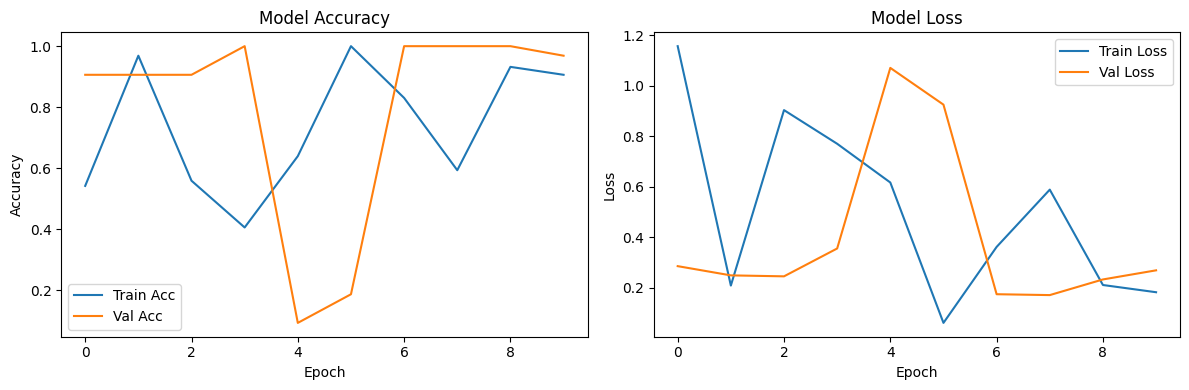

2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 14s/step

Validation Classification Report:
              precision    recall  f1-score   support

        bees       1.00      0.97      0.98        29
       human       0.97      1.00      0.98        29

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



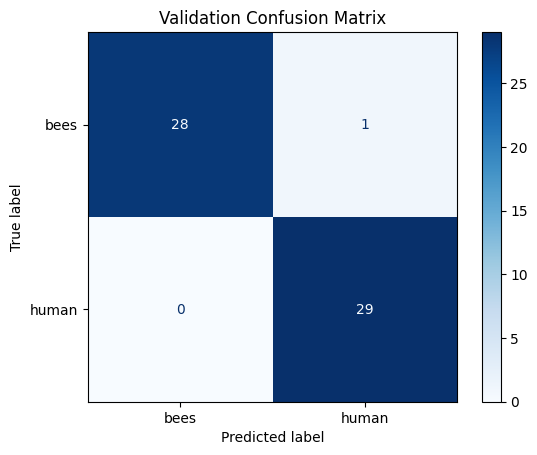

2/2 ━━━━━━━━━━━━━━━━━━━━ 35s 14s/step - accuracy: 0.9781 - loss: 0.2234

Validation Accuracy: 0.9828, Validation Loss: 0.2003


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 587ms/step

Test Classification Report:
              precision    recall  f1-score   support

        bees       1.00      0.97      0.98        29
       human       0.97      1.00      0.98        29

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58

58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 585ms/step - accuracy: 0.9875 - loss: 0.2501

Test Accuracy: 0.9828, Test Loss: 0.1989


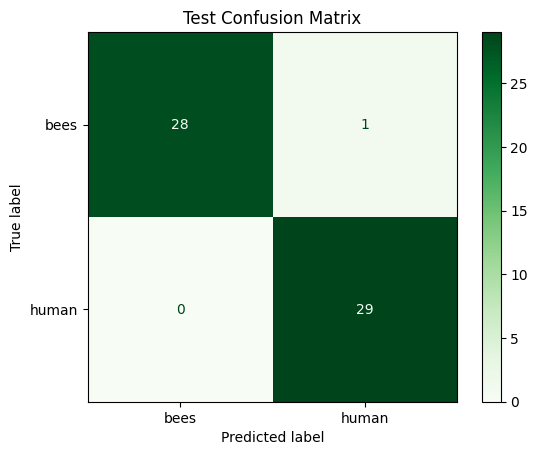

9/9 ━━━━━━━━━━━━━━━━━━━━ 166s 18s/step - accuracy: 0.9672 - loss: 0.1854

Training Accuracy (evaluate): 0.9701, Training Loss: 0.1573


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()




import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def get_true_pred_labels(generator):
    Y_true = generator.classes
    Y_pred_probs = model2.predict(generator)
    Y_pred = (Y_pred_probs > 0.5).astype(int).flatten()
    class_labels = list(generator.class_indices.keys())
    return Y_true, Y_pred, class_labels


# Validation confusion matrix
val_Y_true, val_Y_pred, val_class_labels = get_true_pred_labels(validation_generator)
val_cm = confusion_matrix(val_Y_true, val_Y_pred)
print("\nValidation Classification Report:")
print(classification_report(val_Y_true, val_Y_pred, target_names=val_class_labels))

ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=val_class_labels).plot(cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.show()

# Evaluate on validation set
val_loss, val_accuracy = model2.evaluate(validation_generator)
print(f"\nValidation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")



# Test confusion matrix
test_Y_true, test_Y_pred, test_class_labels = get_true_pred_labels(test_generator)
test_cm = confusion_matrix(test_Y_true, test_Y_pred)
print("\nTest Classification Report:")
print(classification_report(test_Y_true, test_Y_pred, target_names=test_class_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f"\nTest Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=test_class_labels).plot(cmap='Greens')
plt.title('Test Confusion Matrix')
plt.show()


# Evaluate on training set
train_loss, train_accuracy = model2.evaluate(train_generator)
print(f"\nTraining Accuracy (evaluate): {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")




Validation plot with proper plotting

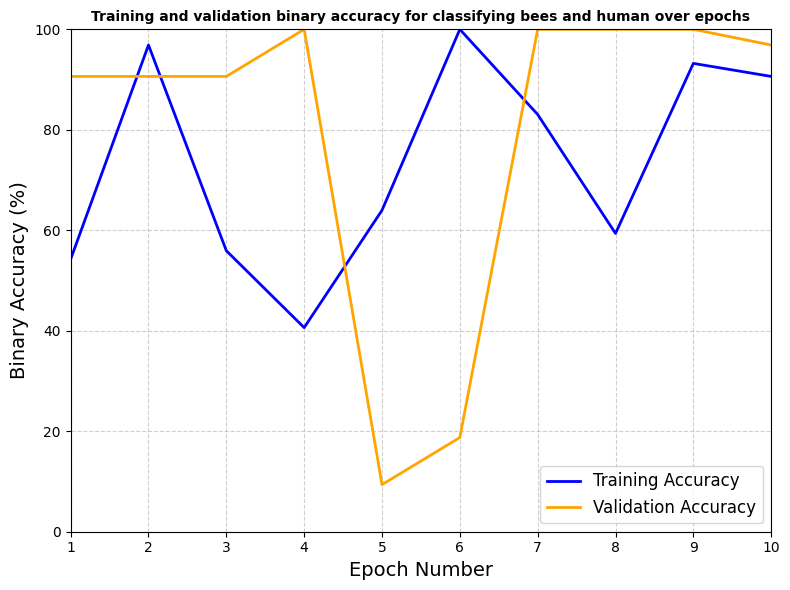

✅ Accuracy plot successfully saved as 'accuracy_epoch10.png'


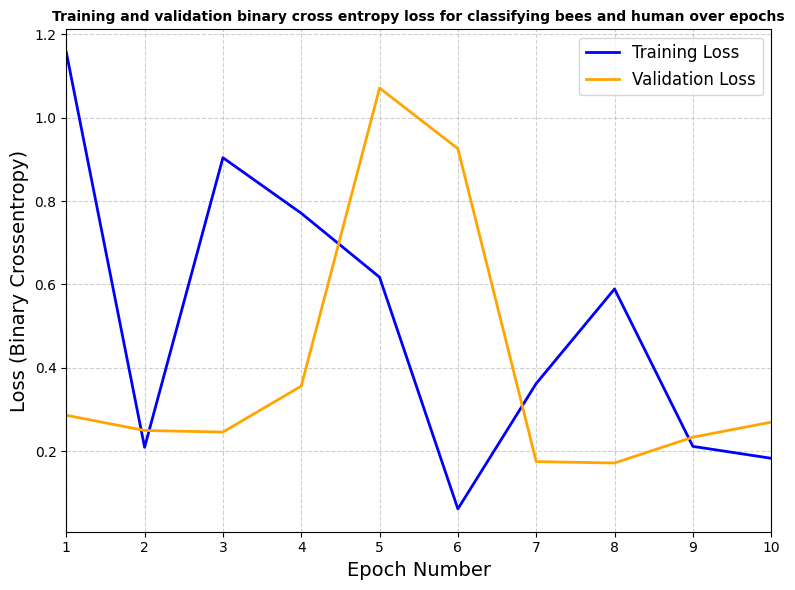

✅ Loss plot successfully saved as 'loss_epoch10.png'


In [ ]:
import matplotlib.pyplot as plt
import os

def plot_accuracy(history, save_path='accuracy_plot.png'):
    acc = [x * 100 for x in history.history['accuracy']]
    val_acc = [x * 100 for x in history.history['val_accuracy']]
    epochs = list(range(1, len(acc) + 1))

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(epochs, acc, label='Training Accuracy', color='blue', linewidth=2)
    ax.plot(epochs, val_acc, label='Validation Accuracy', color='orange', linewidth=2)

    ax.set_title('Training and validation binary accuracy for classifying bees and human over epochs', fontsize=10, fontweight='bold')
    ax.set_xlabel('Epoch Number', fontsize=14)
    ax.set_ylabel('Binary Accuracy (%)', fontsize=14)
    ax.set_xticks(epochs)
    ax.set_xlim([min(epochs), max(epochs)])
    ax.set_ylim([0, 100])
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='lower right', fontsize=12)

    fig.tight_layout()
    fig.savefig(save_path, dpi=300)
    plt.show()

    if os.path.exists(save_path):
        print(f"✅ Accuracy plot successfully saved as '{save_path}'")
    else:
        print(f"❌ Failed to save accuracy plot at '{save_path}'")

def plot_loss(history, save_path='loss_plot.png'):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = list(range(1, len(loss) + 1))

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(epochs, loss, label='Training Loss', color='blue', linewidth=2)
    ax.plot(epochs, val_loss, label='Validation Loss', color='orange', linewidth=2)

    ax.set_title('Training and validation binary cross entropy loss for classifying bees and human over epochs', fontsize=10, fontweight='bold')
    ax.set_xlabel('Epoch Number', fontsize=14)
    ax.set_ylabel('Loss (Binary Crossentropy)', fontsize=14)
    ax.set_xticks(epochs)
    ax.set_xlim([min(epochs), max(epochs)])
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='upper right', fontsize=12)

    fig.tight_layout()
    fig.savefig(save_path, dpi=300)
    plt.show()

    if os.path.exists(save_path):
        print(f"✅ Loss plot successfully saved as '{save_path}'")
    else:
        print(f"❌ Failed to save loss plot at '{save_path}'")


plot_accuracy(history, save_path='accuracy_epoch10.png')
plot_loss(history, save_path='loss_epoch10.png')


This is to check the accuracy for validation dataset.

In [ ]:
# Predict probabilities
y_pred = model2.predict(test_generator)

# Convert to class labels (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# True labels
y_true = test_generator.classes

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

classes = ["bees1", "calf"]

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 679ms/step

Classification Report:
              precision    recall  f1-score   support

       bees1       1.00      1.00      1.00        19
        calf       1.00      1.00      1.00        19

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Confusion Matrix:
[[19  0]
 [ 0 19]]
